# K Nearest Neighbour 

#### About knn algorithm
KNN is one of machine learning algorithm used to make prediction based on past available data. KNN categorise things based on their 'characterstic', it is based on feature similarity. 

KNN is one of the simplest supervised Machine Learning algorithm mostly used for. We can classify data points based on how its neighbour are classified. K in KNN algorithm is the parameter that refer to the number of nearest neighbour to be included in the majority of voting process. For example, when k = 5,  a data points is classified by majority votes from its 5 nearest neighbours. 

How do we choose the factor k? Choosing the right value of k is a process called parameter tuning, and is important for better accuracy. Depending on the k value, our model prediction will differ greatly. Low value of k will cause our prediction to be biased to the noice in the data. While high value of k will take too long to process. The rule of thumb to take the value of k is to take the square root of sample size, which is the total number of data points. We should take odd value of k, to avoid confusion between two classes of data. 

When to choose KNN algorithm? KNN is used when the data is labelled and the data is noice free. It is also good to use KNN when dataset is small because KNN doesn't discriminate functon from training set. 

Usually, euclidian distance is taken to take the distance between one particular data points to its nearest neighbours.


#### Visulization of KNN algorithm

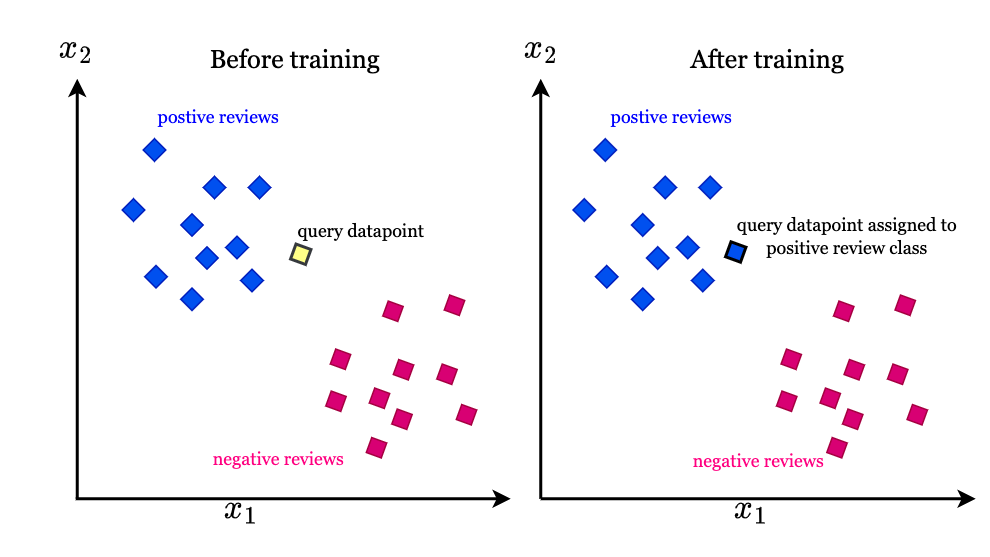

# KNN algorithm [Project 1: Patient's Diabetes Prediction]

Problem Statement:\
As a data analyst, we have to analyze some samples of patients to make prediction about future patient's risk of getting diabetes. The features used for predictions are Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin,
       BMI, DiabetesPedigreeFunction and Age.
       
important fact: If someone has insulin they have diabetes also have high insulin level

Algorithm:\
Predict whether a person has a diabetes or not using KNN algorithm using python

#### Import packages

In [166]:
# import packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# split the data for train and test
from sklearn.model_selection import train_test_split 

# preprocess to rescale the data
# standardization of the data set is common for many machine learning estimator
# the data might behave badly if the individual feature do not look more or less like Gaussian distribution
from sklearn.preprocessing import StandardScaler 

# the actual tool we will use for KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

# these last 3 are the tools to test the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline

#### Standard scaler

Standard Scaler is used to preprocess and rescale the data. This will change data value by scaling the data using (x - u / stddev). We need to keep the data standardize. We don't need to scale the dependent variable


In general, standardization of the data is common for many machine learning estimator. The reason behind this is the data might behave badly if the individual feature do not look more or less like the Gaussian Distribution. We do not want to have bias because of the outlier in the data.

As a rule of thumb, any algorithm that compute distances or assumes normality, have to be scaled before computation.

#### Load dataset

In [127]:
# load dataset

df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [128]:
# info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [129]:
# count na value
# we got no na value

df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Descriptive Statistics

In [130]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#### Clean the data 
Remove zero data and change it to the mean of each columns

In [131]:
non_zero_data = ['Glucose','BloodPressure','SkinThickness','BMI','Insulin']

for column in non_zero_data:
    df[column] = df[column].replace(0, np.NaN) # NaN --> non exist(no data there)
    mean = int(df[column].mean(skipna = True))
    df[column] = df[column].replace(np.NaN, mean) # replace non data to the mean of the column

In [132]:
# after change 0 value to the mean, we get our mean differently
# see insulin and skin thickness mean increase significantly 

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.682292,30.435999,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.0000,32.00000,99.00
Insulin,768.0,155.281250,85.021550,14.000,121.50000,155.0000,155.00000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#### Visualization of the value of the dataset outcome 

0    500
1    268
Name: Outcome, dtype: int64


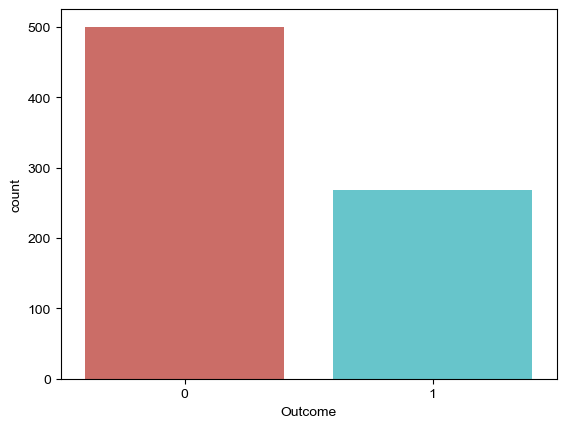

In [167]:
# visualize the outcome

print(df['Outcome'].value_counts())

sns.countplot(x='Outcome',data = df, palette='hls',order = df['Outcome'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

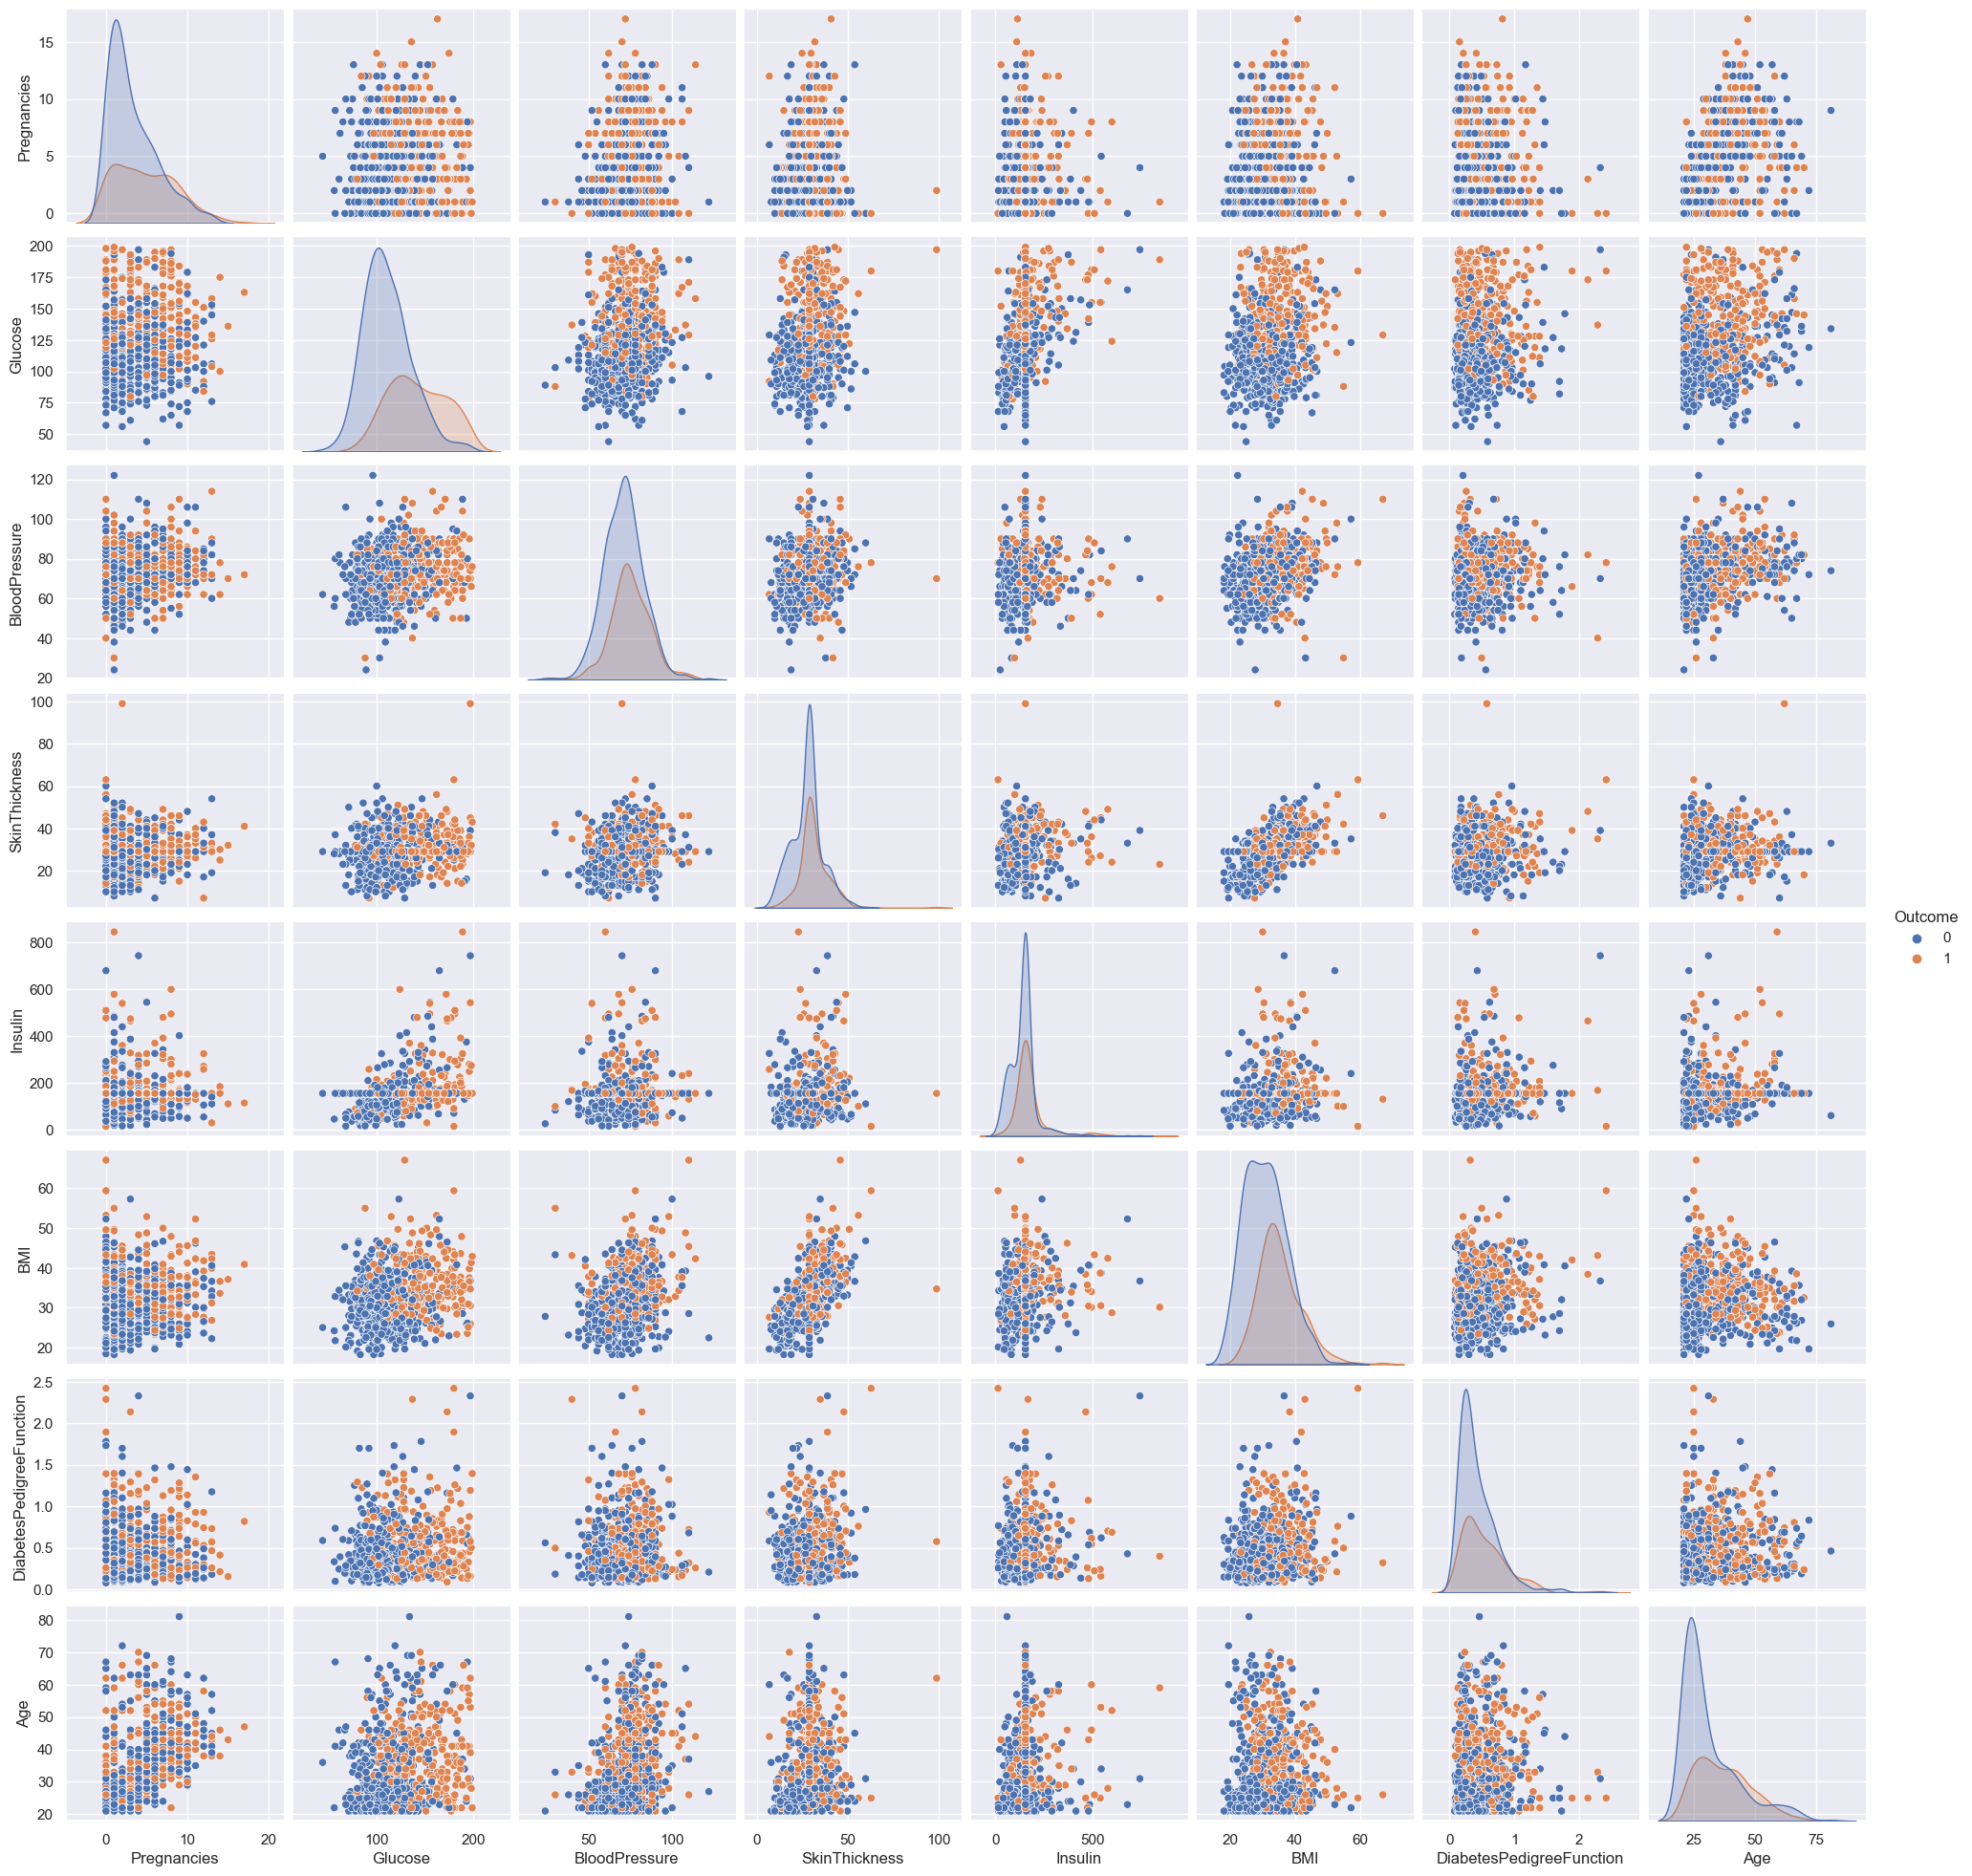

In [158]:
# seaborn pairplot based on outcome (0 for no, 1 for yes)
# Plot pairwise relationships in a dataset.

# By default, this function will create a grid of Axes such that each numeric variable in data 
# will by shared across the y-axes across a single row and the x-axes across a single column.

# The diagonal plots are treated differently: a univariate distribution plot is drawn 
# to show the marginal distribution of the data in each column.

sns.pairplot(df, hue = 'Outcome')

#### Correlation using heatmap

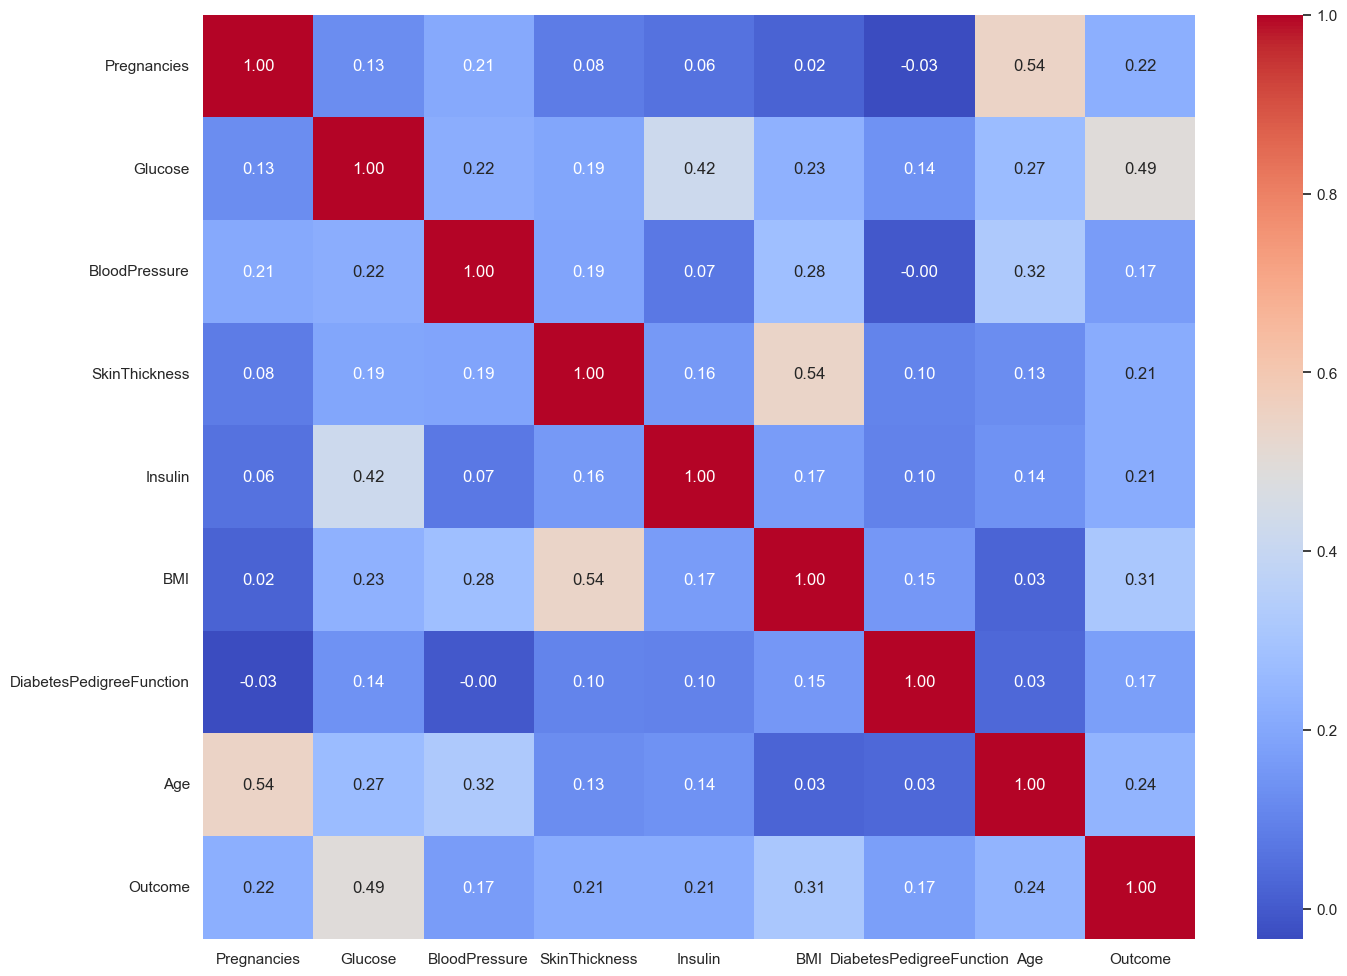

In [163]:
# plot the correlation between the variables in the dataset
# Glucose level has the highest correation with the outcome of the patient ( has diabetes or no)
# Next is BMI

plt.figure(figsize=(16,12))
sns.heatmap(data=df.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

#### KNN algorithm using scikit learn

In [137]:
# split the dataset into independent and dependent variable
# use sklearn.model selection train_test_split

X = df.iloc[:,0:8] # all rows , column 0 to 7
y = df.iloc[:,8] # all rows, column 8 only
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

In [138]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
603,7,150.0,78.0,29.0,126.0,35.2,0.692,54
118,4,97.0,60.0,23.0,155.0,28.2,0.443,22
247,0,165.0,90.0,33.0,680.0,52.3,0.427,23
157,1,109.0,56.0,21.0,135.0,25.2,0.833,23
468,8,120.0,72.0,29.0,155.0,30.0,0.183,38
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
192,7,159.0,66.0,29.0,155.0,30.4,0.383,36
629,4,94.0,65.0,22.0,155.0,24.7,0.148,21
559,11,85.0,74.0,29.0,155.0,30.1,0.300,35


In [139]:
y_train

603    1
118    0
247    0
157    0
468    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: Outcome, Length: 614, dtype: int64

In [140]:
# feature scaling using StandardScaler()
# scale the data using x - u / stddev
# keep the data standardize. We dont need to scale the dependent variable

scaling_x = StandardScaler()
X_train = scaling_x.fit_transform(X_train)
X_test = scaling_x.transform(X_test)

In [141]:
# notice that this data is array according to the 'rows' not 'columns'
X_train

array([[ 0.90832902,  0.93641795,  0.44764174, ...,  0.36863635,
         0.67740401,  1.69955804],
       [ 0.03644676, -0.81630913, -1.05200558, ..., -0.63294341,
        -0.07049698, -0.96569189],
       [-1.12606292,  1.43247278,  1.44740662, ...,  2.81535261,
        -0.11855487, -0.88240283],
       ...,
       [ 0.03644676, -0.91552009, -0.63543688, ..., -1.13373329,
        -0.95656442, -1.04898095],
       [ 2.0708387 , -1.21315299,  0.11438678, ..., -0.36108605,
        -0.50001442,  0.11706589],
       [ 0.32707418,  0.47343344,  0.7808967 , ..., -0.08922869,
         0.52121586,  2.94889395]])

In [142]:
X_test

array([[-0.8354355 ,  2.55686374,  0.28101426, ...,  1.47037408,
         2.78594417, -0.96569189],
       [-0.54480808, -0.4856059 ,  0.11438678, ...,  0.13970383,
        -0.1876381 , -0.88240283],
       [ 0.03644676, -1.51078589, -0.8853781 , ...,  0.19693696,
        -0.22668514, -0.71582471],
       ...,
       [ 0.03644676,  0.67185537,  1.11415166, ...,  1.62776519,
         0.53623395, -0.96569189],
       [-0.25418066, -0.187973  ,  0.11438678, ..., -0.90480077,
        -1.07971278, -0.79911377],
       [-0.8354355 , -0.4856059 , -0.0522407 , ..., -0.26092807,
         1.06487079, -0.79911377]])

In [143]:
# define the model using KNeighborsClassifier and fit the train data in the model
# Define the model: Init k_NN
# n_neighbors is k value, 
# p is 2 because our model is for binary prediction(diabetic or not) 
# our metric is euclidean
classifier = KNeighborsClassifier(n_neighbors = 11 , p = 2, metric = 'euclidean')

# Fit model
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [144]:
# our neighbors number must be odd, so k = 11
import math
math.sqrt(len(y_test))

12.409673645990857

In [145]:
# Predict using test set data
y_pred = classifier.predict(X_test)

In [147]:
# the number of patients that have no diabetes based on our prediction is 109

(y_pred == 0).sum()

109

In [148]:
# the number of patients that do have diabetes based on our prediction is 45

(y_pred == 1).sum()

45

In [149]:
# Evaluate the model: confusion_matrix
# true positive = 32
# false positive = 13
# false  negative = 15
# true negative = 94
cm = confusion_matrix(y_test, y_pred)
cm

array([[94, 13],
       [15, 32]], dtype=int64)

In [150]:
# Evaluate the model: accuracy_model
# how many we get right vs how many we get wrong
accuracy_score(y_test,y_pred)

0.8181818181818182

In [151]:
# Evaluate the model: F1 value --> takes into account both sides of false positive
# precision = true_positive / (true_positive + false_positive)
# recall = true_positive / (true_positive + false_negative)
# F1 = 2 * (precision * recall) / (precision + recall)

f1_score(y_test, y_pred)

0.6956521739130436

Text(0.5, 1.0, 'Accuracy Score: 0.8181818181818182')

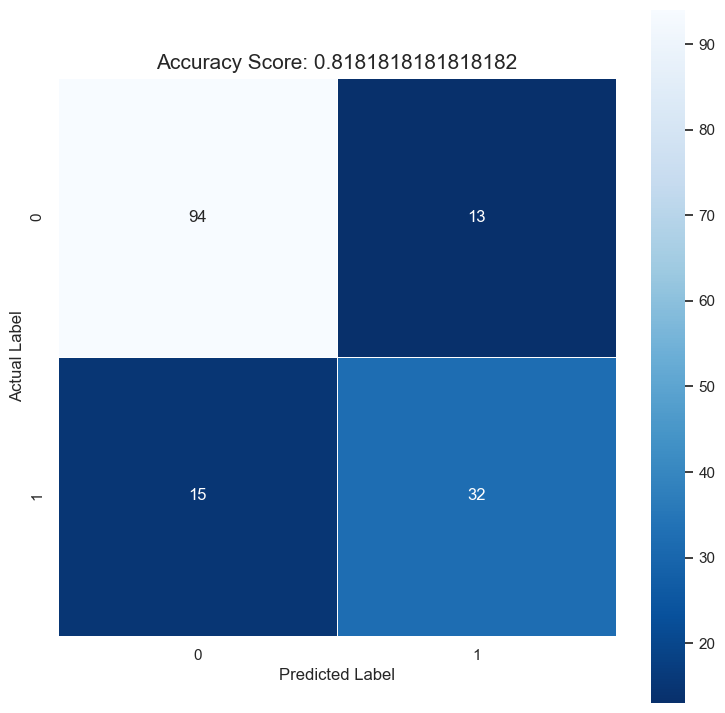

In [152]:
# accuracy score of logistic regression model 
# make confusion matrix using seaborn heatmap


from sklearn import metrics
import seaborn as sns

cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize = (9,9))
sns.heatmap(cm, annot = True, fmt = ".0f", linewidth = 0.5, square = True, cmap = "Blues_r") 
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15)

#### KNN with different k-value

As expected the maximum accuracy is when k = sqrt(N), where N is the number of test data

In [153]:
k_value = np.arange(1,25+1)
k_value

accuracy = []

for i in k_value:
    classifier = KNeighborsClassifier(n_neighbors = i , p = 2, metric = 'euclidean')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy.append(accuracy_score(y_test,y_pred))
    
print(accuracy)

[0.7532467532467533, 0.7467532467532467, 0.7857142857142857, 0.7987012987012987, 0.7597402597402597, 0.7857142857142857, 0.7922077922077922, 0.8181818181818182, 0.7987012987012987, 0.8051948051948052, 0.8181818181818182, 0.7987012987012987, 0.8181818181818182, 0.7987012987012987, 0.8116883116883117, 0.7857142857142857, 0.7857142857142857, 0.7922077922077922, 0.7792207792207793, 0.7857142857142857, 0.7792207792207793, 0.7922077922077922, 0.7857142857142857, 0.7857142857142857, 0.7922077922077922]
